In [1]:
import numpy as np
from numerical_methods.linear_iter_methods import jacobi, gauss_seidel, sor


# Part 1


In [2]:
A = np.array([[4, 1, -1], [-1, 3, 1], [2, 2, 6]])
b = np.array([[5, -4, 1]]).T
x0 = np.zeros(shape=b.shape)

A, b

(array([[ 4,  1, -1],
        [-1,  3,  1],
        [ 2,  2,  6]]),
 array([[ 5],
        [-4],
        [ 1]]))

In [3]:
jacobi(A, b, x0, max_iter=3)


array([[ 1.54166667],
       [-0.85648148],
       [-0.05092593]])

In [4]:
gauss_seidel(A, b, x0, max_iter=3)


array([[ 1.45196759],
       [-0.83391204],
       [-0.03935185]])

In [5]:
sor(A, b, x0, w=1.1, max_iter=3)


array([[ 1.43231701],
       [-0.83290758],
       [-0.02942417]])

In [6]:
sor(A, b, x0, w=0.9, max_iter=3)


array([[ 1.46285388],
       [-0.8439338 ],
       [-0.03719093]])

# Part 2


In [7]:
import time
from functools import partial
import pandas as pd


def generate_random(n):
    A = n / 2 * np.identity(n) + np.random.normal(size=(n, n))
    b = np.random.normal(size=(n, 1))
    return A, b

In [8]:
def sor11(*args, **kwargs):
    return sor(*args, w=1.1, **kwargs)


def sor09(*args, **kwargs):
    return sor(*args, w=0.9, **kwargs)


methods = [jacobi, gauss_seidel, sor11, sor09]
ns = [10, 25, 50, 100, 200, 500]

# init
time_dict = {"n": ns}
iter_dict = {"n": ns}
for f in methods:
    time_dict[f.__name__] = []
    iter_dict[f.__name__] = []

for n in ns:
    A, b = generate_random(n)
    x0 = np.zeros(shape=b.shape)
    results = {"err": [], "iter": []}
    for f in methods:
        start = time.time()
        x, it = f(A, b, x0, max_iter=100000, return_iter=True)
        time_dict[f.__name__].append(time.time() - start)
        iter_dict[f.__name__].append(it)

time_df = pd.DataFrame(time_dict)
iter_df = pd.DataFrame(iter_dict)

In [9]:
time_df

,n,jacobi,gauss_seidel,sor11,sor09
0,10,0.005777,0.001864,0.003789,0.001816
1,25,0.002401,0.001681,0.002535,0.002362
2,50,0.002616,0.001790,0.003470,0.003343
3,100,0.004291,0.003209,0.006012,0.006197
4,200,0.007100,0.005838,0.011441,0.011139
5,500,0.015091,0.011801,0.025980,0.025778


<AxesSubplot:title={'center':'Execution Time for Different Methods'}, xlabel='n', ylabel='sec'>

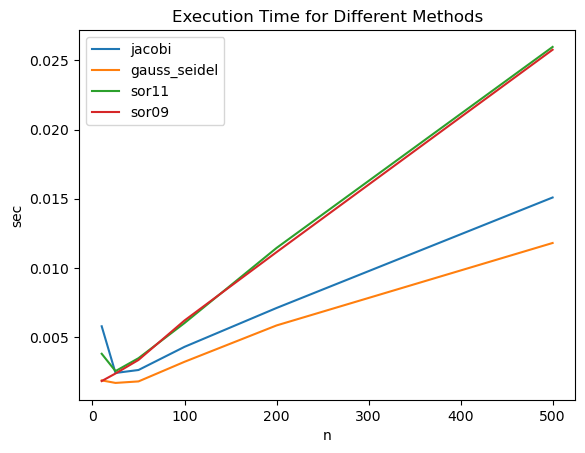

In [10]:
time_df.plot(
    x="n",
    title="Execution Time for Different Methods",
    legend=True,
    ylabel="sec",
)

In [11]:
iter_df

,n,jacobi,gauss_seidel,sor11,sor09
0,10,78,30,48,25
1,25,19,12,17,14
2,50,15,10,14,13
3,100,12,9,12,12
4,200,10,8,11,11
5,500,8,6,10,10


<AxesSubplot:title={'center':'#Iteration to Converge for Different Methods'}, xlabel='n', ylabel='iteration'>

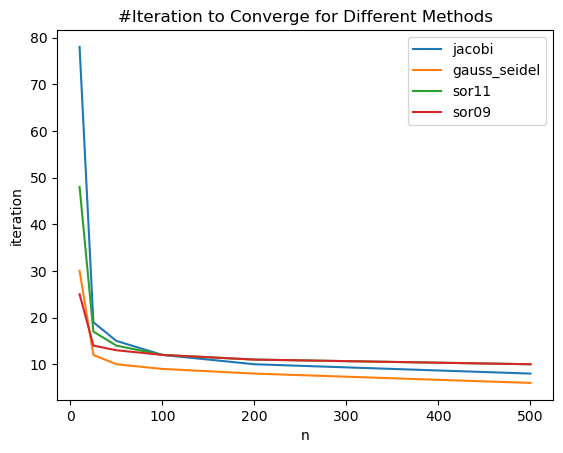

In [12]:
iter_df.plot(
    x="n",
    title="#Iteration to Converge for Different Methods",
    legend=True,
    ylabel="iteration",
)

In [13]:
A, b = generate_random(500)
err_dict = {}

for f in methods:
    xk = np.zeros(shape=b.shape)
    err_dict[f.__name__] = []
    for i in range(10):
        xk = f(A, b, xk, max_iter=1)
        err = np.linalg.norm(A @ xk - b, ord=2)
        err_dict[f.__name__].append(err)
err_df = pd.DataFrame(err_dict)
err_df

,jacobi,gauss_seidel,sor11,sor09
0,2.109540e+00,1.368828e+00,2.662167e+00,2.562364e+00
1,1.819354e-01,6.628416e-02,3.823110e-01,3.428214e-01
2,1.612607e-02,3.232372e-03,5.702781e-02,4.731178e-02
3,1.486645e-03,1.222164e-04,8.653901e-03,6.514853e-03
4,1.261629e-04,5.098390e-06,1.324481e-03,8.921659e-04
5,1.170438e-05,1.785042e-07,2.023370e-04,1.218878e-04
6,1.037461e-06,1.952895e-10,3.063848e-05,1.665876e-05
7,8.562955e-09,6.292222e-12,4.588176e-06,2.280220e-06
8,7.385624e-10,2.179709e-13,6.800926e-07,3.126204e-07
9,6.619304e-11,1.102886e-14,1.461904e-08,5.905880e-09


<AxesSubplot:title={'center':'error verse iteration number for each method for n = 500'}, xlabel='iteration', ylabel='error'>

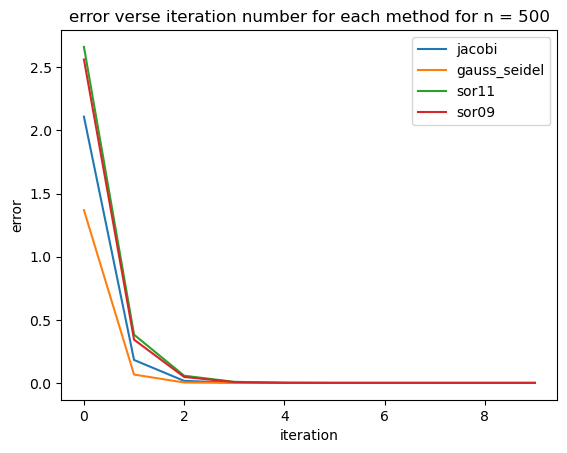

In [14]:
err_df.plot(
    title="error verse iteration number for each method for n = 500",
    legend=True,
    xlabel="iteration",
    ylabel="error",
)